In [3]:
import numpy as np
import module1

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = module1.load_data('./Stock_data.pkl')

In [5]:
data

{'stock names': {'A': 'Agilent Technologies, Inc.',
  'B': 'Barnes Group Inc.',
  'C': 'Citigroup Inc.',
  'D': 'Dominion Energy, Inc.',
  'F': 'Ford Motor Company',
  'M': "Macy's, Inc.",
  'S': 'Sprint Corporation',
  'T': 'AT&T Inc.',
  'X': 'United States Steel Corporation',
  'Y': 'Alleghany Corporation',
  'AAPL': 'Apple Inc.',
  'GOOG': 'Google',
  'INTC': 'Intel',
  'NVDA': 'Nvidia'},
 'prices': array([[ 25.965666,  25.708155,  24.871244, ...,  67.300003,  67.449997,
          66.970001],
        [289.200012, 289.299988, 282.399994, ...,  74.889999,  75.080002,
          74.410004],
        [ 41.      ,  41.389999,  40.889999, ...,  38.889999,  39.18    ,
          38.880001],
        ...,
        [ 27.834286,  27.847143,  25.721428, ..., 170.600006, 171.080002,
         169.229996],
        [360.068756, 361.454529, 356.373383, ..., 592.080017, 596.599976,
         596.090027],
        [ 24.99    ,  23.57    ,  22.4     , ...,  25.639999,  25.719999,
          25.190001]]),
 'p

In [7]:
stock_names = data['stock names']
stock_names

{'A': 'Agilent Technologies, Inc.',
 'B': 'Barnes Group Inc.',
 'C': 'Citigroup Inc.',
 'D': 'Dominion Energy, Inc.',
 'F': 'Ford Motor Company',
 'M': "Macy's, Inc.",
 'S': 'Sprint Corporation',
 'T': 'AT&T Inc.',
 'X': 'United States Steel Corporation',
 'Y': 'Alleghany Corporation',
 'AAPL': 'Apple Inc.',
 'GOOG': 'Google',
 'INTC': 'Intel',
 'NVDA': 'Nvidia'}

In [8]:
price_relatives = data['price relatives']
price_relatives

array([[0.98991   , 0.99008263, 0.97723437, ..., 1.00133915, 1.00014821,
        0.99214816],
       [0.97275487, 0.99007521, 0.98706742, ..., 1.00294631, 1.00226936,
        0.98988966],
       [0.98771385, 1.00436787, 0.99658786, ..., 0.9951381 , 1.00461538,
        0.99133095],
       ...,
       [0.9777689 , 0.99754364, 0.94045441, ..., 1.00293945, 1.00046785,
        0.99243486],
       [0.96410725, 0.99739975, 0.98657289, ..., 1.00267573, 1.00680083,
        0.99717287],
       [0.96561055, 0.92722266, 0.97137905, ..., 0.95422397, 1.00272901,
        0.97863252]])

In [10]:
prices = data['prices']
prices

array([[ 25.965666,  25.708155,  24.871244, ...,  67.300003,  67.449997,
         66.970001],
       [289.200012, 289.299988, 282.399994, ...,  74.889999,  75.080002,
         74.410004],
       [ 41.      ,  41.389999,  40.889999, ...,  38.889999,  39.18    ,
         38.880001],
       ...,
       [ 27.834286,  27.847143,  25.721428, ..., 170.600006, 171.080002,
        169.229996],
       [360.068756, 361.454529, 356.373383, ..., 592.080017, 596.599976,
        596.090027],
       [ 24.99    ,  23.57    ,  22.4     , ...,  25.639999,  25.719999,
         25.190001]])

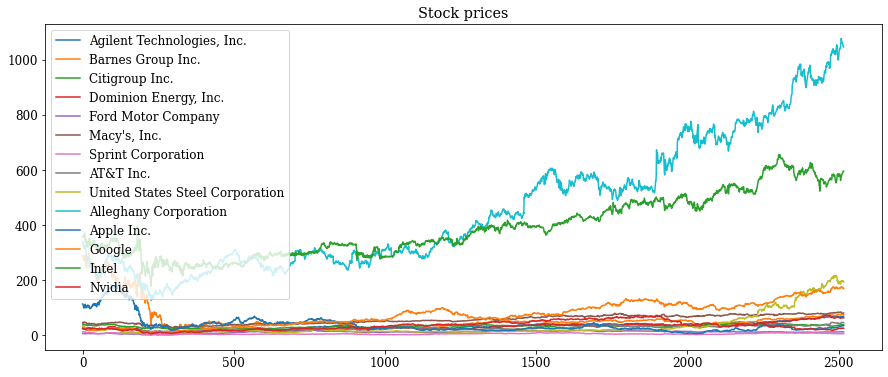

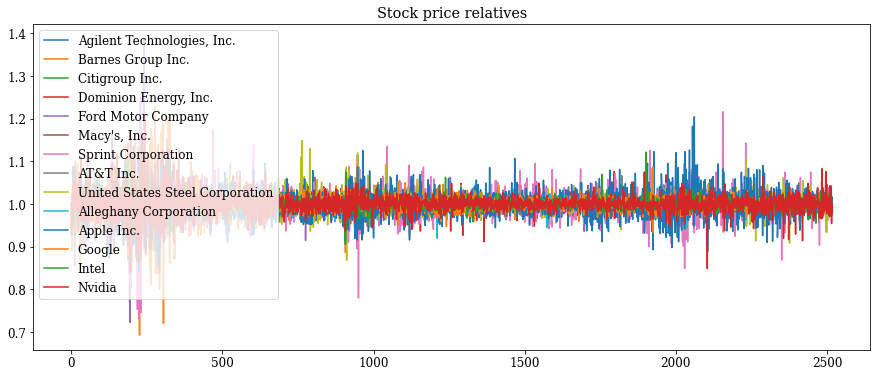

In [11]:
data = module1.load_data('./Stock_data.pkl')
stock_names = data['stock names']
price_relatives = data['price relatives']
prices = data['prices']

i = 0
for key in stock_names:
    plt.plot(prices[i], label=stock_names[key])
    i+=1   
plt.legend(loc = 2)
plt.title(r'Stock prices');

plt.figure()
i = 0
for key in stock_names:
    plt.plot(price_relatives[i], label=stock_names[key])
    i+=1   
plt.legend(loc = 2)
plt.title(r'Stock price relatives');

In [17]:
price_relatives[[0,1,2,3],:] # across all rows / timestamps or dates

array([[0.98991   , 0.99008263, 0.97723437, ..., 1.00133915, 1.00014821,
        0.99214816],
       [0.97275487, 0.99007521, 0.98706742, ..., 1.00294631, 1.00226936,
        0.98988966],
       [0.98771385, 1.00436787, 0.99658786, ..., 0.9951381 , 1.00461538,
        0.99133095],
       [1.00299395, 1.00417409, 0.96726727, ..., 1.00299406, 0.99984301,
        0.99122666]])

In [12]:
# Approximate optimal CRP in hindsight , weights + gain for the 1st 3 components
res1, res2 = module1.approx_optimal_CRP(price_relatives[[0,1,2],:], N=50000)

In [13]:
res1 # this is numpy float64 to convert them in to numpy float instead then convert to list 
# 9.94951848e-01 = 9*10**-1 = 9*0.1 , 4.75162692e-03 = 4*10**-3 = 4*0.001 ...etc

array([9.94951848e-01, 4.75162692e-03, 2.96524793e-04])

In [20]:
print(res1.tolist())

[0.9949518482905373, 0.004751626916610942, 0.0002965247928518527]


In [22]:
print(res1.tolist()[0]) , print(res1.tolist()[1]) , print(res1.tolist()[2])

0.9949518482905373
0.004751626916610942
0.0002965247928518527


(None, None, None)

In [14]:
res2

4.347460846119518

In [15]:
print("Optimal portfolio for the stocks = ", res1)
print("Gain = ", res2)

Optimal portfolio for the stocks =  [9.94951848e-01 4.75162692e-03 2.96524793e-04]
Gain =  4.347460846119518


In [23]:
# Approximate Universal Portfolio algorithm
res = module1.approx_UP(price_relatives[[0,1],:], alpha=0.5, N=50000)
print("Gain from approximate universal portfolio algorithm = ",res)

Gain from approximate universal portfolio algorithm =  4.048588264052822


# Funtion to implement UP and adaptive UP at each day and find results


Wealth ratio =  1.0594380248394655


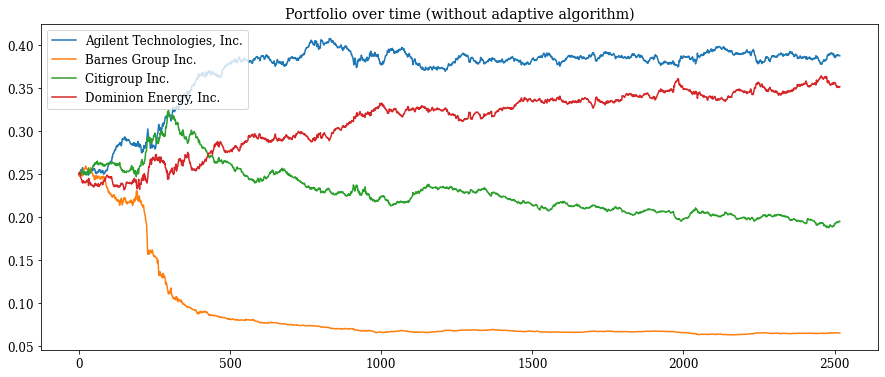

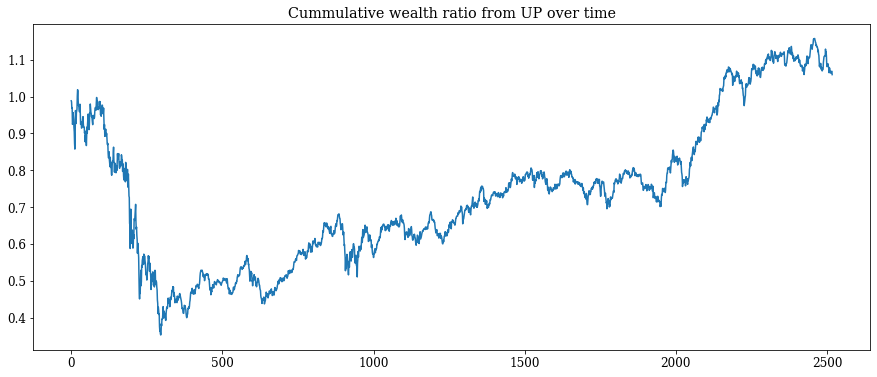

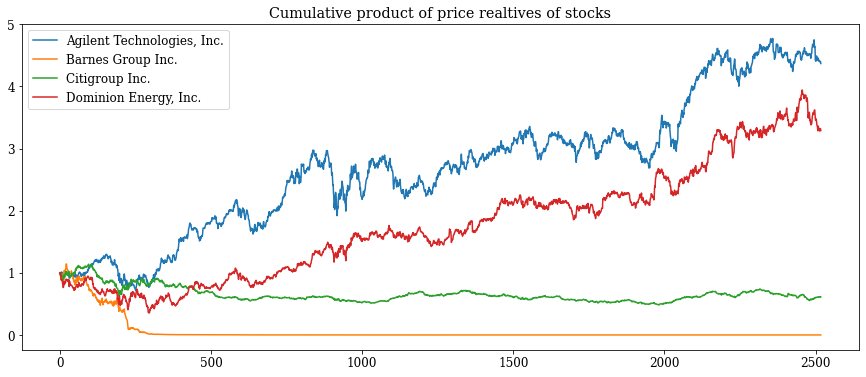

In [24]:
idx = [0,1,2,3]
w,r,ws = module1.approx_UP_advanced(price_relatives[idx,:], alpha=0.5, N=50000)
print('Wealth ratio = ',w)

names = np.array( list( stock_names.values() ) )[idx]
for i in range(r.shape[1]):
    plt.plot(r[:,i],label = names[i])
plt.legend()
plt.title('Portfolio over time (without adaptive algorithm)')
plt.show()

plt.plot(np.cumprod(ws))
plt.title('Cummulative wealth ratio from UP over time')
plt.show()

for i in range(r.shape[1]):
    plt.plot(np.cumprod(price_relatives[idx,:],axis = 1)[i],label =  names[i])
plt.legend()
plt.title('Cumulative product of price realtives of stocks')
plt.show()

In [26]:
# It is implemented using another papramter, w, which weights each potfolio, where porfolios with larger wealth
# ratio would get more weight and weights add upto one ( w = wealth ratio from portfolio / sum of wealth ratio from
# all portfolios)

print(np.cumprod(ws)) , print(np.cumprod(w)) , print(np.cumprod(r))

[0.98834317 0.98557324 0.9678334  ... 1.06738179 1.06850176 1.05943802]
[1.05943802]
[0.25     0.0625   0.015625 ... 0.       0.       0.      ]


(None, None, None)

# Performance of different constant rebalance portfolios (CRP) and universal portfolio (UP) algorithm on two stocks

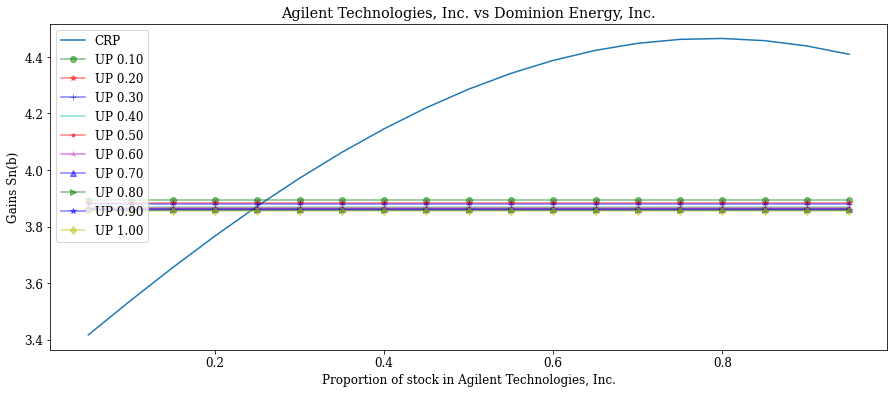

CPU times: user 6.84 s, sys: 19.3 s, total: 26.1 s
Wall time: 5.77 s


In [29]:
%%time
idx1 = [0,3] # [0,3],[1,6],[2,9], [3,5], [4,6]
stocks = price_relatives[idx1,:]
names = np.array( list( stock_names.values() ) )[idx1]
alphas = np.arange(0.1,1.1,0.1)
snlist = []
UPlist = []
plist = np.arange(0.05,1,0.05)
for p in plist:
    a = np.array([p,1-p])
    temp = np.prod( a@stocks )
    snlist.append(temp)
plt.plot(plist, snlist, label = 'CRP')    

crp, crp_wealth = module1.approx_optimal_CRP(stocks,N=50000)
linestyles1 = ['-go','-r*','-b+','c-','-r.','-m2','-b^','-g>', '-b*','-yd']
for i,alpha in enumerate(alphas) :
    temp = module1.approx_UP(stocks,alpha = alpha,N=50000)
    UPlist.append( temp ) 
    plt.plot(plist, [temp]*len(plist), linestyles1[i],label = 'UP {0:2.2f}'.format(alpha),alpha = 0.5)

plt.xlabel('Proportion of stock in '+names[0])
plt.ylabel('Gains Sn(b)')
plt.title(names[0]+' vs ' +names[1])
plt.legend()
plt.show()

# Case of 3 stocks 

For stocks Alleghany Corporation, Dominion Energy, Inc., Ford Motor Company
Wealth from approximate optimal CRP = 3.2673050487253437

Wealth using approx_UP
Wealth from UP 0.10 = 2.7542
Wealth from UP 0.20 = 2.5871
Wealth from UP 0.30 = 2.4651
Wealth from UP 0.40 = 2.3385
Wealth from UP 0.50 = 2.2637
Wealth from UP 0.60 = 2.1834
Wealth from UP 0.70 = 2.1065
Wealth from UP 0.80 = 2.0533
Wealth from UP 0.90 = 2.0055
Wealth from UP 1.00 = 1.9592

Wealth using adaptive approx_UP (portfolio calculated each day)
Wealth from adaptive UP 0.10 = 1.4401
Wealth from adaptive UP 0.20 = 1.2363
Wealth from adaptive UP 0.30 = 1.1017
Wealth from adaptive UP 0.40 = 0.9913
Wealth from adaptive UP 0.50 = 0.8962
Wealth from adaptive UP 0.60 = 0.8309
Wealth from adaptive UP 0.70 = 0.7705
Wealth from adaptive UP 0.80 = 0.7231
Wealth from adaptive UP 0.90 = 0.6806
Wealth from adaptive UP 1.00 = 0.6489
CPU times: user 1min 6s, sys: 41.1 s, total: 1min 48s
Wall time: 1min 6s


Text(0.5, 1.0, 'Wealth ration from UP vs dirichlet paramter alpha')

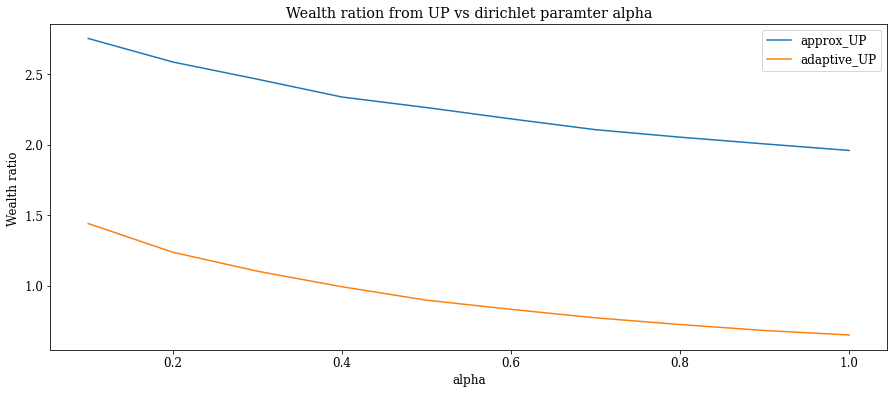

In [28]:

%%time
idx1 = [9,3,4]
stocks = price_relatives[idx1,:]
names = np.array(list( stock_names.values() ) )[idx1]
alphas = np.arange(0.1,1.1,0.1)

crp, crp_wealth = module1.approx_optimal_CRP(stocks,N=50000)
print('For stocks {0:}, {1:}, {2:}'.format(names[0],names[1],names[2]))
print('Wealth from approximate optimal CRP = '+ str(crp_wealth) )
print('\nWealth using approx_UP')
UPlist = []
for alpha in alphas:
    temp = module1.approx_UP(stocks,alpha = alpha,N=50000)
    UPlist.append( temp )
    print('Wealth from UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )

print('\nWealth using adaptive approx_UP (portfolio calculated each day)')
UPlist1 = []
for alpha in alphas:
    temp,_,_ = module1.approx_UP_advanced(stocks,alpha = alpha,N=50000,adap='on')
    UPlist1.append( temp )
    print('Wealth from adaptive UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )

plt.plot(alphas, UPlist,label='approx_UP' )
plt.plot(alphas, UPlist1,label='adaptive_UP' )
plt.xlabel('alpha')
plt.ylabel('Wealth ratio ')
plt.legend()
plt.title('Wealth ration from UP vs dirichlet paramter alpha')

